In [ ]:
from glob import glob 
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
%cd drive/MyDrive/data_semantics/
!ls
path = os.getcwd()
print(path)

[Errno 2] No such file or directory: 'drive/MyDrive/data_semantics/'
/content/drive/MyDrive/data_semantics
testing  training
/content/drive/MyDrive/data_semantics


In [ ]:
def load_data(path):
    train_x = sorted(glob(os.path.join(path, "training", "image_2", "*.png")))
    train_y = sorted(glob(os.path.join(path, "training", "semantic", "*.png")))
    return (train_x,train_y)

In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
from glob import glob
from tqdm import tqdm
import zipfile
import functools

In [ ]:
import imageio           # for gif mask
from albumentations import HorizontalFlip, VerticalFlip, ElasticTransform, GridDistortion, OpticalDistortion


In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['figure.figsize'] = (12,12)

from PIL import Image

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,jaccard_score,precision_score,recall_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
# from tensorflow.python.keras import layers
# from tensorflow.python.keras import losses
# from tensorflow.python.keras import models 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPool2D, Flatten, BatchNormalization, Activation, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall,Precision

In [ ]:
os.getcwd()

'/content/drive/MyDrive/data_semantics'

In [ ]:
np.random.seed(105)


In [ ]:
(train_x,train_y) = load_data(path)

In [ ]:
train_x[0]

'/content/drive/MyDrive/data_semantics/training/image_2/000018_10.png'

In [ ]:
import random

img = cv2.imread(os.path.join(path, "training", "image_2", "000020_10.png"))
mask = cv2.imread(os.path.join(path, "training", "semantic", "000020_10.png"))

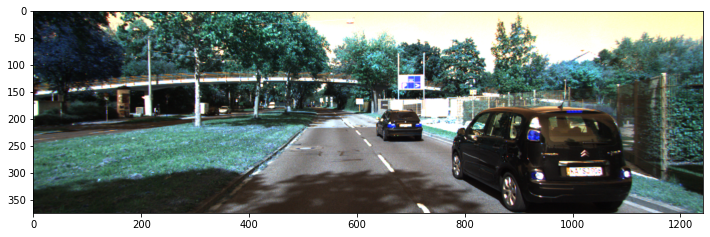

In [ ]:

plt.imshow(img)

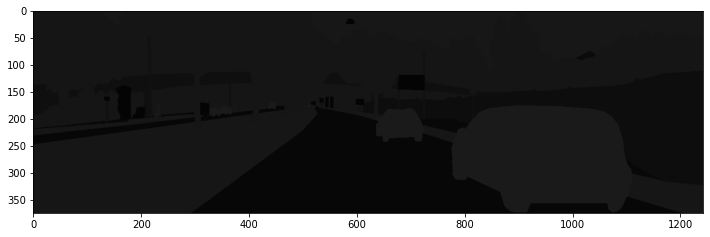

In [ ]:
plt.imshow(mask)


In [ ]:
def create_dir(path):
    if not (os.path.exists(path)):
        os.makedirs(path)

In [ ]:
to_path = os.path.join(path,"final_data")


In [ ]:
create_dir("final_data/images")
create_dir("final_data/masks")

In [ ]:
def augment_data(images, masks, to_path, augment=True):
    h, w, = 512, 512
    for (x,y) in tqdm(zip(images, masks), total=len(images)):
        fname = x.split("/")[-1].split(".")[0]
        #print(fname)
        img = cv2.imread(x, cv2.IMREAD_COLOR)
        mask = cv2.imread(y, cv2.IMREAD_GRAYSCALE)
        #plt.imshow(img)
        #plt.imshow(mask)

        X, Y = [img], [mask]
        if augment:            
            augmentation = HorizontalFlip(p=1.0)
            augmented = augmentation(image=img, mask=mask)
            X.append(augmented["image"])
            Y.append(augmented["mask"])

            # augmentation = VerticalFlip(p=1.0)
            # augmented = augmentation(image=img, mask=mask)
            # X.append(augmented["image"])
            # Y.append(augmented["mask"])

            augmentation = GridDistortion(num_steps=5, p=0.8)
            augmented = augmentation(image=img, mask=mask)
            X.append(augmented["image"])
            Y.append(augmented["mask"])

            augmentation = ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03, p=0.8)
            augmented = augmentation(image=img, mask=mask)
            X.append(augmented["image"])
            Y.append(augmented["mask"])

            augmentation = OpticalDistortion(distort_limit=2, shift_limit=0.5, p=0.8)
            augmented = augmentation(image=img, mask=mask)
            X.append(augmented["image"])
            Y.append(augmented["mask"])
            
        else:
            pass

        
        for ind, (img1, mask1) in enumerate(zip(X, Y)):
            img1 = cv2.resize(img1, (w,h))
            mask1 = cv2.resize(mask1, (w,h))

            tmp_img_name = f"{fname}_{ind}.png"
            tmp_mask_name = f"{fname}_{ind}.png"

            img_path = os.path.join(to_path, "images", tmp_img_name)
            mask_path = os.path.join(to_path, "masks", tmp_mask_name)

            display(img_path)
            display(mask_path)

            cv2.imwrite(img_path, img1)
            cv2.imwrite(mask_path, mask1)
            

In [ ]:
def create_dir(path):
    if not (os.path.exists(path)):
        os.makedirs(path)

to_path = os.path.join(path,"final_data")


create_dir("final_data/images")
create_dir("final_data/masks")

In [ ]:



augment_data(train_x, train_y, to_path,augment=True)


  0%|          | 0/182 [00:00<?, ?it/s]

'/content/drive/MyDrive/data_semantics/final_data/images/000018_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000018_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000018_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000018_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000018_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000018_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000018_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000018_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000018_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000018_10_4.png'

  1%|          | 1/182 [00:01<03:35,  1.19s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000019_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000019_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000019_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000019_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000019_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000019_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000019_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000019_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000019_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000019_10_4.png'

  1%|          | 2/182 [00:01<03:12,  1.07s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000020_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000020_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000020_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000020_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000020_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000020_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000020_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000020_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000020_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000020_10_4.png'

  2%|▏         | 3/182 [00:02<02:56,  1.01it/s]

'/content/drive/MyDrive/data_semantics/final_data/images/000021_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000021_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000021_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000021_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000021_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000021_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000021_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000021_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000021_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000021_10_4.png'

  2%|▏         | 4/182 [00:03<02:50,  1.04it/s]

'/content/drive/MyDrive/data_semantics/final_data/images/000022_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000022_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000022_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000022_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000022_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000022_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000022_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000022_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000022_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000022_10_4.png'

  3%|▎         | 5/182 [00:05<03:19,  1.13s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000023_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000023_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000023_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000023_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000023_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000023_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000023_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000023_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000023_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000023_10_4.png'

  3%|▎         | 6/182 [00:06<03:27,  1.18s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000024_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000024_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000024_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000024_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000024_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000024_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000024_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000024_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000024_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000024_10_4.png'

  4%|▍         | 7/182 [00:07<03:17,  1.13s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000025_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000025_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000025_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000025_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000025_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000025_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000025_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000025_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000025_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000025_10_4.png'

  4%|▍         | 8/182 [00:08<03:27,  1.19s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000026_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000026_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000026_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000026_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000026_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000026_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000026_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000026_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000026_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000026_10_4.png'

  5%|▍         | 9/182 [00:10<03:35,  1.25s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000027_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000027_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000027_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000027_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000027_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000027_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000027_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000027_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000027_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000027_10_4.png'

  5%|▌         | 10/182 [00:11<03:22,  1.18s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000028_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000028_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000028_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000028_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000028_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000028_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000028_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000028_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000028_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000028_10_4.png'

  6%|▌         | 11/182 [00:12<03:19,  1.17s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000029_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000029_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000029_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000029_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000029_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000029_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000029_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000029_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000029_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000029_10_4.png'

  7%|▋         | 12/182 [00:13<03:11,  1.13s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000030_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000030_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000030_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000030_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000030_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000030_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000030_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000030_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000030_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000030_10_4.png'

  7%|▋         | 13/182 [00:14<03:16,  1.16s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000031_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000031_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000031_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000031_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000031_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000031_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000031_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000031_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000031_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000031_10_4.png'

  8%|▊         | 14/182 [00:18<05:18,  1.89s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000032_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000032_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000032_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000032_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000032_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000032_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000032_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000032_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000032_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000032_10_4.png'

  8%|▊         | 15/182 [00:20<05:31,  1.98s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000033_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000033_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000033_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000033_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000033_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000033_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000033_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000033_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000033_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000033_10_4.png'

  9%|▉         | 16/182 [00:21<04:48,  1.74s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000034_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000034_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000034_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000034_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000034_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000034_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000034_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000034_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000034_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000034_10_4.png'

  9%|▉         | 17/182 [00:22<04:18,  1.57s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000035_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000035_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000035_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000035_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000035_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000035_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000035_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000035_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000035_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000035_10_4.png'

 10%|▉         | 18/182 [00:23<03:56,  1.44s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000036_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000036_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000036_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000036_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000036_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000036_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000036_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000036_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000036_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000036_10_4.png'

 10%|█         | 19/182 [00:24<03:29,  1.29s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000037_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000037_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000037_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000037_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000037_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000037_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000037_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000037_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000037_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000037_10_4.png'

 11%|█         | 20/182 [00:26<03:34,  1.32s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000038_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000038_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000038_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000038_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000038_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000038_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000038_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000038_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000038_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000038_10_4.png'

 12%|█▏        | 21/182 [00:26<03:02,  1.13s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000039_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000039_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000039_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000039_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000039_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000039_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000039_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000039_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000039_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000039_10_4.png'

 12%|█▏        | 22/182 [00:28<03:00,  1.13s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000040_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000040_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000040_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000040_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000040_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000040_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000040_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000040_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000040_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000040_10_4.png'

 13%|█▎        | 23/182 [00:29<03:01,  1.14s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000041_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000041_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000041_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000041_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000041_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000041_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000041_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000041_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000041_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000041_10_4.png'

 13%|█▎        | 24/182 [00:30<03:09,  1.20s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000042_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000042_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000042_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000042_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000042_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000042_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000042_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000042_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000042_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000042_10_4.png'

 14%|█▎        | 25/182 [00:31<03:16,  1.25s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000043_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000043_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000043_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000043_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000043_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000043_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000043_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000043_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000043_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000043_10_4.png'

 14%|█▍        | 26/182 [00:33<03:15,  1.25s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000044_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000044_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000044_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000044_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000044_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000044_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000044_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000044_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000044_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000044_10_4.png'

 15%|█▍        | 27/182 [00:34<03:25,  1.33s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000045_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000045_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000045_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000045_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000045_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000045_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000045_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000045_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000045_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000045_10_4.png'

 15%|█▌        | 28/182 [00:35<03:13,  1.26s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000046_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000046_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000046_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000046_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000046_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000046_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000046_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000046_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000046_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000046_10_4.png'

 16%|█▌        | 29/182 [00:36<03:05,  1.21s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000047_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000047_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000047_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000047_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000047_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000047_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000047_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000047_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000047_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000047_10_4.png'

 16%|█▋        | 30/182 [00:38<02:59,  1.18s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000048_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000048_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000048_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000048_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000048_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000048_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000048_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000048_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000048_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000048_10_4.png'

 17%|█▋        | 31/182 [00:39<02:55,  1.16s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000049_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000049_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000049_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000049_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000049_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000049_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000049_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000049_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000049_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000049_10_4.png'

 18%|█▊        | 32/182 [00:40<03:05,  1.24s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000050_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000050_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000050_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000050_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000050_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000050_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000050_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000050_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000050_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000050_10_4.png'

 18%|█▊        | 33/182 [00:41<03:05,  1.25s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000051_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000051_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000051_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000051_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000051_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000051_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000051_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000051_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000051_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000051_10_4.png'

 19%|█▊        | 34/182 [00:42<02:49,  1.14s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000052_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000052_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000052_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000052_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000052_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000052_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000052_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000052_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000052_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000052_10_4.png'

 19%|█▉        | 35/182 [00:43<02:42,  1.11s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000053_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000053_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000053_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000053_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000053_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000053_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000053_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000053_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000053_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000053_10_4.png'

 20%|█▉        | 36/182 [00:45<02:57,  1.22s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000054_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000054_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000054_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000054_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000054_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000054_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000054_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000054_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000054_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000054_10_4.png'

 20%|██        | 37/182 [00:46<03:08,  1.30s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000055_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000055_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000055_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000055_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000055_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000055_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000055_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000055_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000055_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000055_10_4.png'

 21%|██        | 38/182 [00:47<03:01,  1.26s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000056_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000056_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000056_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000056_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000056_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000056_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000056_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000056_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000056_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000056_10_4.png'

 21%|██▏       | 39/182 [00:49<03:07,  1.31s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000057_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000057_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000057_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000057_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000057_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000057_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000057_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000057_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000057_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000057_10_4.png'

 22%|██▏       | 40/182 [00:50<03:08,  1.33s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000058_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000058_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000058_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000058_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000058_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000058_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000058_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000058_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000058_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000058_10_4.png'

 23%|██▎       | 41/182 [00:52<03:19,  1.41s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000059_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000059_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000059_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000059_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000059_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000059_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000059_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000059_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000059_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000059_10_4.png'

 23%|██▎       | 42/182 [00:53<03:06,  1.33s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000060_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000060_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000060_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000060_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000060_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000060_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000060_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000060_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000060_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000060_10_4.png'

 24%|██▎       | 43/182 [00:54<03:12,  1.38s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000061_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000061_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000061_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000061_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000061_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000061_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000061_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000061_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000061_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000061_10_4.png'

 24%|██▍       | 44/182 [00:56<03:04,  1.34s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000062_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000062_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000062_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000062_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000062_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000062_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000062_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000062_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000062_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000062_10_4.png'

 25%|██▍       | 45/182 [00:57<03:05,  1.35s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000063_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000063_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000063_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000063_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000063_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000063_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000063_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000063_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000063_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000063_10_4.png'

 25%|██▌       | 46/182 [00:58<03:01,  1.33s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000064_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000064_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000064_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000064_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000064_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000064_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000064_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000064_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000064_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000064_10_4.png'

 26%|██▌       | 47/182 [01:00<02:59,  1.33s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000065_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000065_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000065_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000065_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000065_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000065_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000065_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000065_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000065_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000065_10_4.png'

 26%|██▋       | 48/182 [01:01<02:58,  1.33s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000066_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000066_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000066_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000066_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000066_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000066_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000066_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000066_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000066_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000066_10_4.png'

 27%|██▋       | 49/182 [01:02<02:56,  1.33s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000067_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000067_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000067_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000067_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000067_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000067_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000067_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000067_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000067_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000067_10_4.png'

 27%|██▋       | 50/182 [01:03<02:44,  1.24s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000068_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000068_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000068_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000068_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000068_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000068_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000068_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000068_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000068_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000068_10_4.png'

 28%|██▊       | 51/182 [01:05<02:58,  1.36s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000069_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000069_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000069_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000069_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000069_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000069_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000069_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000069_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000069_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000069_10_4.png'

 29%|██▊       | 52/182 [01:06<02:48,  1.30s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000070_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000070_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000070_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000070_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000070_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000070_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000070_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000070_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000070_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000070_10_4.png'

 29%|██▉       | 53/182 [01:07<02:42,  1.26s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000071_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000071_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000071_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000071_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000071_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000071_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000071_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000071_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000071_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000071_10_4.png'

 30%|██▉       | 54/182 [01:08<02:32,  1.19s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000072_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000072_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000072_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000072_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000072_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000072_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000072_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000072_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000072_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000072_10_4.png'

 30%|███       | 55/182 [01:10<02:32,  1.20s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000073_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000073_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000073_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000073_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000073_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000073_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000073_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000073_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000073_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000073_10_4.png'

 31%|███       | 56/182 [01:11<02:34,  1.23s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000074_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000074_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000074_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000074_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000074_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000074_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000074_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000074_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000074_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000074_10_4.png'

 31%|███▏      | 57/182 [01:12<02:22,  1.14s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000075_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000075_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000075_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000075_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000075_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000075_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000075_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000075_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000075_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000075_10_4.png'

 32%|███▏      | 58/182 [01:13<02:19,  1.12s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000076_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000076_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000076_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000076_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000076_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000076_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000076_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000076_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000076_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000076_10_4.png'

 32%|███▏      | 59/182 [01:14<02:15,  1.10s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000077_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000077_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000077_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000077_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000077_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000077_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000077_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000077_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000077_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000077_10_4.png'

 33%|███▎      | 60/182 [01:15<02:20,  1.16s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000078_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000078_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000078_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000078_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000078_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000078_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000078_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000078_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000078_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000078_10_4.png'

 34%|███▎      | 61/182 [01:16<02:17,  1.13s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000079_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000079_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000079_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000079_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000079_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000079_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000079_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000079_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000079_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000079_10_4.png'

 34%|███▍      | 62/182 [01:17<02:08,  1.07s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000080_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000080_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000080_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000080_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000080_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000080_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000080_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000080_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000080_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000080_10_4.png'

 35%|███▍      | 63/182 [01:19<02:23,  1.21s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000081_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000081_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000081_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000081_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000081_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000081_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000081_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000081_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000081_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000081_10_4.png'

 35%|███▌      | 64/182 [01:20<02:23,  1.22s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000082_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000082_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000082_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000082_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000082_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000082_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000082_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000082_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000082_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000082_10_4.png'

 36%|███▌      | 65/182 [01:21<02:22,  1.22s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000083_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000083_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000083_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000083_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000083_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000083_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000083_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000083_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000083_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000083_10_4.png'

 36%|███▋      | 66/182 [01:22<02:19,  1.20s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000084_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000084_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000084_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000084_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000084_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000084_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000084_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000084_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000084_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000084_10_4.png'

 37%|███▋      | 67/182 [01:23<02:12,  1.15s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000085_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000085_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000085_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000085_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000085_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000085_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000085_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000085_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000085_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000085_10_4.png'

 37%|███▋      | 68/182 [01:25<02:27,  1.29s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000086_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000086_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000086_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000086_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000086_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000086_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000086_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000086_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000086_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000086_10_4.png'

 38%|███▊      | 69/182 [01:27<02:41,  1.43s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000087_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000087_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000087_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000087_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000087_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000087_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000087_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000087_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000087_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000087_10_4.png'

 38%|███▊      | 70/182 [01:28<02:24,  1.29s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000088_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000088_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000088_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000088_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000088_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000088_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000088_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000088_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000088_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000088_10_4.png'

 39%|███▉      | 71/182 [01:29<02:18,  1.25s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000089_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000089_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000089_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000089_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000089_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000089_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000089_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000089_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000089_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000089_10_4.png'

 40%|███▉      | 72/182 [01:30<02:26,  1.33s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000090_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000090_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000090_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000090_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000090_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000090_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000090_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000090_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000090_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000090_10_4.png'

 40%|████      | 73/182 [01:32<02:26,  1.34s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000091_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000091_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000091_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000091_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000091_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000091_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000091_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000091_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000091_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000091_10_4.png'

 41%|████      | 74/182 [01:34<02:37,  1.46s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000092_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000092_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000092_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000092_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000092_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000092_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000092_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000092_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000092_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000092_10_4.png'

 41%|████      | 75/182 [01:35<02:25,  1.36s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000093_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000093_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000093_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000093_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000093_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000093_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000093_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000093_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000093_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000093_10_4.png'

 42%|████▏     | 76/182 [01:36<02:23,  1.35s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000094_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000094_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000094_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000094_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000094_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000094_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000094_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000094_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000094_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000094_10_4.png'

 42%|████▏     | 77/182 [01:37<02:13,  1.27s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000095_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000095_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000095_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000095_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000095_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000095_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000095_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000095_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000095_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000095_10_4.png'

 43%|████▎     | 78/182 [01:38<02:04,  1.19s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000096_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000096_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000096_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000096_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000096_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000096_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000096_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000096_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000096_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000096_10_4.png'

 43%|████▎     | 79/182 [01:39<02:05,  1.21s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000097_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000097_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000097_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000097_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000097_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000097_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000097_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000097_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000097_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000097_10_4.png'

 44%|████▍     | 80/182 [01:41<02:17,  1.35s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000098_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000098_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000098_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000098_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000098_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000098_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000098_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000098_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000098_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000098_10_4.png'

 45%|████▍     | 81/182 [01:42<02:06,  1.26s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000099_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000099_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000099_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000099_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000099_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000099_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000099_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000099_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000099_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000099_10_4.png'

 45%|████▌     | 82/182 [01:43<02:08,  1.28s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000100_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000100_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000100_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000100_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000100_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000100_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000100_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000100_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000100_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000100_10_4.png'

 46%|████▌     | 83/182 [01:45<02:10,  1.32s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000101_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000101_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000101_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000101_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000101_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000101_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000101_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000101_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000101_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000101_10_4.png'

 46%|████▌     | 84/182 [01:46<02:13,  1.36s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000102_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000102_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000102_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000102_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000102_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000102_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000102_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000102_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000102_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000102_10_4.png'

 47%|████▋     | 85/182 [01:48<02:18,  1.43s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000103_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000103_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000103_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000103_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000103_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000103_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000103_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000103_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000103_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000103_10_4.png'

 47%|████▋     | 86/182 [01:49<02:11,  1.37s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000104_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000104_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000104_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000104_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000104_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000104_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000104_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000104_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000104_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000104_10_4.png'

 48%|████▊     | 87/182 [01:50<02:09,  1.36s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000105_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000105_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000105_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000105_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000105_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000105_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000105_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000105_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000105_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000105_10_4.png'

 48%|████▊     | 88/182 [01:51<01:58,  1.27s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000106_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000106_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000106_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000106_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000106_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000106_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000106_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000106_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000106_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000106_10_4.png'

 49%|████▉     | 89/182 [01:54<02:22,  1.53s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000107_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000107_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000107_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000107_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000107_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000107_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000107_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000107_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000107_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000107_10_4.png'

 49%|████▉     | 90/182 [01:55<02:14,  1.46s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000108_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000108_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000108_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000108_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000108_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000108_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000108_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000108_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000108_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000108_10_4.png'

 50%|█████     | 91/182 [01:56<01:57,  1.29s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000109_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000109_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000109_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000109_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000109_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000109_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000109_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000109_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000109_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000109_10_4.png'

 51%|█████     | 92/182 [01:57<02:02,  1.36s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000110_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000110_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000110_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000110_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000110_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000110_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000110_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000110_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000110_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000110_10_4.png'

 51%|█████     | 93/182 [01:58<01:54,  1.28s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000111_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000111_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000111_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000111_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000111_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000111_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000111_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000111_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000111_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000111_10_4.png'

 52%|█████▏    | 94/182 [02:00<01:57,  1.33s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000112_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000112_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000112_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000112_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000112_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000112_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000112_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000112_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000112_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000112_10_4.png'

 52%|█████▏    | 95/182 [02:01<01:50,  1.27s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000113_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000113_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000113_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000113_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000113_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000113_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000113_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000113_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000113_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000113_10_4.png'

 53%|█████▎    | 96/182 [02:02<01:38,  1.15s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000114_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000114_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000114_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000114_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000114_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000114_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000114_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000114_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000114_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000114_10_4.png'

 53%|█████▎    | 97/182 [02:03<01:47,  1.27s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000115_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000115_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000115_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000115_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000115_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000115_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000115_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000115_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000115_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000115_10_4.png'

 54%|█████▍    | 98/182 [02:05<01:43,  1.23s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000116_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000116_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000116_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000116_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000116_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000116_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000116_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000116_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000116_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000116_10_4.png'

 54%|█████▍    | 99/182 [02:06<01:44,  1.26s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000117_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000117_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000117_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000117_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000117_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000117_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000117_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000117_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000117_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000117_10_4.png'

 55%|█████▍    | 100/182 [02:07<01:45,  1.29s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000118_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000118_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000118_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000118_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000118_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000118_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000118_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000118_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000118_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000118_10_4.png'

 55%|█████▌    | 101/182 [02:09<01:46,  1.31s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000119_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000119_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000119_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000119_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000119_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000119_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000119_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000119_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000119_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000119_10_4.png'

 56%|█████▌    | 102/182 [02:10<01:50,  1.38s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000120_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000120_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000120_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000120_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000120_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000120_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000120_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000120_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000120_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000120_10_4.png'

 57%|█████▋    | 103/182 [02:11<01:47,  1.36s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000121_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000121_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000121_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000121_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000121_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000121_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000121_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000121_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000121_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000121_10_4.png'

 57%|█████▋    | 104/182 [02:12<01:38,  1.26s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000122_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000122_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000122_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000122_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000122_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000122_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000122_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000122_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000122_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000122_10_4.png'

 58%|█████▊    | 105/182 [02:14<01:52,  1.46s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000123_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000123_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000123_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000123_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000123_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000123_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000123_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000123_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000123_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000123_10_4.png'

 58%|█████▊    | 106/182 [02:16<01:48,  1.43s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000124_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000124_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000124_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000124_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000124_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000124_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000124_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000124_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000124_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000124_10_4.png'

 59%|█████▉    | 107/182 [02:17<01:42,  1.36s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000125_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000125_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000125_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000125_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000125_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000125_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000125_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000125_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000125_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000125_10_4.png'

 59%|█████▉    | 108/182 [02:19<01:45,  1.43s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000126_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000126_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000126_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000126_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000126_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000126_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000126_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000126_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000126_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000126_10_4.png'

 60%|█████▉    | 109/182 [02:20<01:43,  1.42s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000127_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000127_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000127_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000127_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000127_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000127_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000127_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000127_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000127_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000127_10_4.png'

 60%|██████    | 110/182 [02:21<01:32,  1.28s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000128_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000128_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000128_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000128_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000128_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000128_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000128_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000128_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000128_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000128_10_4.png'

 61%|██████    | 111/182 [02:22<01:29,  1.26s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000129_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000129_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000129_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000129_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000129_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000129_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000129_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000129_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000129_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000129_10_4.png'

 62%|██████▏   | 112/182 [02:23<01:22,  1.18s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000130_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000130_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000130_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000130_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000130_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000130_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000130_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000130_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000130_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000130_10_4.png'

 62%|██████▏   | 113/182 [02:25<01:29,  1.29s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000131_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000131_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000131_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000131_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000131_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000131_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000131_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000131_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000131_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000131_10_4.png'

 63%|██████▎   | 114/182 [02:26<01:27,  1.29s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000132_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000132_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000132_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000132_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000132_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000132_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000132_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000132_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000132_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000132_10_4.png'

 63%|██████▎   | 115/182 [02:27<01:29,  1.33s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000133_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000133_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000133_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000133_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000133_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000133_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000133_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000133_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000133_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000133_10_4.png'

 64%|██████▎   | 116/182 [02:29<01:28,  1.35s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000134_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000134_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000134_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000134_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000134_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000134_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000134_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000134_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000134_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000134_10_4.png'

 64%|██████▍   | 117/182 [02:30<01:20,  1.24s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000135_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000135_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000135_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000135_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000135_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000135_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000135_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000135_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000135_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000135_10_4.png'

 65%|██████▍   | 118/182 [02:31<01:21,  1.27s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000136_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000136_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000136_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000136_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000136_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000136_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000136_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000136_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000136_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000136_10_4.png'

 65%|██████▌   | 119/182 [02:32<01:22,  1.30s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000137_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000137_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000137_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000137_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000137_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000137_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000137_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000137_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000137_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000137_10_4.png'

 66%|██████▌   | 120/182 [02:34<01:22,  1.34s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000138_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000138_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000138_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000138_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000138_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000138_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000138_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000138_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000138_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000138_10_4.png'

 66%|██████▋   | 121/182 [02:35<01:25,  1.41s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000139_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000139_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000139_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000139_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000139_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000139_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000139_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000139_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000139_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000139_10_4.png'

 67%|██████▋   | 122/182 [02:37<01:25,  1.43s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000140_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000140_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000140_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000140_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000140_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000140_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000140_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000140_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000140_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000140_10_4.png'

 68%|██████▊   | 123/182 [02:38<01:23,  1.42s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000141_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000141_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000141_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000141_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000141_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000141_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000141_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000141_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000141_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000141_10_4.png'

 68%|██████▊   | 124/182 [02:40<01:20,  1.38s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000142_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000142_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000142_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000142_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000142_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000142_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000142_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000142_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000142_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000142_10_4.png'

 69%|██████▊   | 125/182 [02:41<01:18,  1.38s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000143_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000143_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000143_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000143_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000143_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000143_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000143_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000143_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000143_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000143_10_4.png'

 69%|██████▉   | 126/182 [02:42<01:15,  1.34s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000144_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000144_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000144_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000144_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000144_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000144_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000144_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000144_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000144_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000144_10_4.png'

 70%|██████▉   | 127/182 [02:43<01:10,  1.29s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000145_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000145_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000145_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000145_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000145_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000145_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000145_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000145_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000145_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000145_10_4.png'

 70%|███████   | 128/182 [02:45<01:10,  1.31s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000146_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000146_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000146_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000146_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000146_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000146_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000146_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000146_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000146_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000146_10_4.png'

 71%|███████   | 129/182 [02:46<01:07,  1.28s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000147_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000147_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000147_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000147_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000147_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000147_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000147_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000147_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000147_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000147_10_4.png'

 71%|███████▏  | 130/182 [02:47<00:59,  1.15s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000148_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000148_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000148_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000148_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000148_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000148_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000148_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000148_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000148_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000148_10_4.png'

 72%|███████▏  | 131/182 [02:48<01:03,  1.24s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000149_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000149_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000149_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000149_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000149_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000149_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000149_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000149_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000149_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000149_10_4.png'

 73%|███████▎  | 132/182 [02:49<00:57,  1.15s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000150_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000150_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000150_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000150_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000150_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000150_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000150_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000150_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000150_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000150_10_4.png'

 73%|███████▎  | 133/182 [02:50<00:55,  1.14s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000151_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000151_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000151_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000151_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000151_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000151_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000151_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000151_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000151_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000151_10_4.png'

 74%|███████▎  | 134/182 [02:52<00:57,  1.20s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000152_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000152_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000152_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000152_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000152_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000152_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000152_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000152_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000152_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000152_10_4.png'

 74%|███████▍  | 135/182 [02:53<00:54,  1.17s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000153_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000153_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000153_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000153_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000153_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000153_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000153_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000153_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000153_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000153_10_4.png'

 75%|███████▍  | 136/182 [02:54<00:57,  1.25s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000154_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000154_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000154_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000154_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000154_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000154_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000154_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000154_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000154_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000154_10_4.png'

 75%|███████▌  | 137/182 [02:55<00:54,  1.21s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000155_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000155_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000155_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000155_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000155_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000155_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000155_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000155_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000155_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000155_10_4.png'

 76%|███████▌  | 138/182 [02:56<00:49,  1.13s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000156_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000156_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000156_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000156_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000156_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000156_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000156_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000156_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000156_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000156_10_4.png'

 76%|███████▋  | 139/182 [02:58<00:51,  1.20s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000157_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000157_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000157_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000157_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000157_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000157_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000157_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000157_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000157_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000157_10_4.png'

 77%|███████▋  | 140/182 [02:59<00:49,  1.17s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000158_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000158_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000158_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000158_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000158_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000158_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000158_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000158_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000158_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000158_10_4.png'

 77%|███████▋  | 141/182 [03:00<00:50,  1.24s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000159_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000159_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000159_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000159_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000159_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000159_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000159_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000159_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000159_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000159_10_4.png'

 78%|███████▊  | 142/182 [03:02<00:52,  1.31s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000160_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000160_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000160_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000160_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000160_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000160_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000160_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000160_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000160_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000160_10_4.png'

 79%|███████▊  | 143/182 [03:03<00:47,  1.23s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000161_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000161_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000161_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000161_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000161_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000161_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000161_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000161_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000161_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000161_10_4.png'

 79%|███████▉  | 144/182 [03:04<00:45,  1.19s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000162_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000162_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000162_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000162_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000162_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000162_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000162_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000162_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000162_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000162_10_4.png'

 80%|███████▉  | 145/182 [03:05<00:42,  1.16s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000163_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000163_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000163_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000163_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000163_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000163_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000163_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000163_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000163_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000163_10_4.png'

 80%|████████  | 146/182 [03:06<00:40,  1.14s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000164_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000164_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000164_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000164_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000164_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000164_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000164_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000164_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000164_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000164_10_4.png'

 81%|████████  | 147/182 [03:07<00:40,  1.17s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000165_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000165_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000165_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000165_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000165_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000165_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000165_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000165_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000165_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000165_10_4.png'

 81%|████████▏ | 148/182 [03:08<00:36,  1.09s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000166_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000166_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000166_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000166_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000166_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000166_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000166_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000166_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000166_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000166_10_4.png'

 82%|████████▏ | 149/182 [03:09<00:37,  1.15s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000167_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000167_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000167_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000167_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000167_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000167_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000167_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000167_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000167_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000167_10_4.png'

 82%|████████▏ | 150/182 [03:10<00:35,  1.10s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000168_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000168_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000168_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000168_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000168_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000168_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000168_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000168_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000168_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000168_10_4.png'

 83%|████████▎ | 151/182 [03:11<00:33,  1.08s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000169_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000169_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000169_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000169_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000169_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000169_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000169_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000169_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000169_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000169_10_4.png'

 84%|████████▎ | 152/182 [03:13<00:34,  1.14s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000170_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000170_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000170_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000170_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000170_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000170_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000170_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000170_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000170_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000170_10_4.png'

 84%|████████▍ | 153/182 [03:14<00:31,  1.10s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000171_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000171_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000171_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000171_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000171_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000171_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000171_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000171_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000171_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000171_10_4.png'

 85%|████████▍ | 154/182 [03:15<00:35,  1.28s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000172_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000172_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000172_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000172_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000172_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000172_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000172_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000172_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000172_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000172_10_4.png'

 85%|████████▌ | 155/182 [03:16<00:33,  1.23s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000173_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000173_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000173_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000173_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000173_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000173_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000173_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000173_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000173_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000173_10_4.png'

 86%|████████▌ | 156/182 [03:18<00:33,  1.27s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000174_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000174_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000174_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000174_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000174_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000174_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000174_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000174_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000174_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000174_10_4.png'

 86%|████████▋ | 157/182 [03:19<00:32,  1.30s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000175_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000175_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000175_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000175_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000175_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000175_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000175_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000175_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000175_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000175_10_4.png'

 87%|████████▋ | 158/182 [03:21<00:32,  1.36s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000176_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000176_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000176_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000176_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000176_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000176_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000176_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000176_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000176_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000176_10_4.png'

 87%|████████▋ | 159/182 [03:22<00:31,  1.35s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000177_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000177_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000177_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000177_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000177_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000177_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000177_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000177_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000177_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000177_10_4.png'

 88%|████████▊ | 160/182 [03:23<00:30,  1.37s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000178_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000178_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000178_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000178_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000178_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000178_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000178_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000178_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000178_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000178_10_4.png'

 88%|████████▊ | 161/182 [03:24<00:26,  1.26s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000179_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000179_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000179_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000179_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000179_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000179_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000179_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000179_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000179_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000179_10_4.png'

 89%|████████▉ | 162/182 [03:26<00:25,  1.26s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000180_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000180_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000180_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000180_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000180_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000180_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000180_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000180_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000180_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000180_10_4.png'

 90%|████████▉ | 163/182 [03:27<00:23,  1.23s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000181_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000181_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000181_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000181_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000181_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000181_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000181_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000181_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000181_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000181_10_4.png'

 90%|█████████ | 164/182 [03:28<00:21,  1.19s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000182_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000182_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000182_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000182_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000182_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000182_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000182_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000182_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000182_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000182_10_4.png'

 91%|█████████ | 165/182 [03:29<00:22,  1.30s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000183_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000183_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000183_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000183_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000183_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000183_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000183_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000183_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000183_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000183_10_4.png'

 91%|█████████ | 166/182 [03:31<00:19,  1.25s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000184_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000184_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000184_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000184_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000184_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000184_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000184_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000184_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000184_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000184_10_4.png'

 92%|█████████▏| 167/182 [03:32<00:18,  1.22s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000185_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000185_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000185_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000185_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000185_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000185_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000185_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000185_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000185_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000185_10_4.png'

 92%|█████████▏| 168/182 [03:33<00:16,  1.21s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000186_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000186_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000186_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000186_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000186_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000186_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000186_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000186_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000186_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000186_10_4.png'

 93%|█████████▎| 169/182 [03:34<00:15,  1.21s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000187_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000187_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000187_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000187_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000187_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000187_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000187_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000187_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000187_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000187_10_4.png'

 93%|█████████▎| 170/182 [03:36<00:15,  1.33s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000188_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000188_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000188_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000188_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000188_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000188_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000188_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000188_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000188_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000188_10_4.png'

 94%|█████████▍| 171/182 [03:37<00:14,  1.31s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000189_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000189_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000189_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000189_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000189_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000189_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000189_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000189_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000189_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000189_10_4.png'

 95%|█████████▍| 172/182 [03:38<00:12,  1.28s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000190_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000190_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000190_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000190_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000190_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000190_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000190_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000190_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000190_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000190_10_4.png'

 95%|█████████▌| 173/182 [03:40<00:11,  1.28s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000191_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000191_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000191_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000191_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000191_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000191_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000191_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000191_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000191_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000191_10_4.png'

 96%|█████████▌| 174/182 [03:41<00:10,  1.30s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000192_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000192_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000192_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000192_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000192_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000192_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000192_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000192_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000192_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000192_10_4.png'

 96%|█████████▌| 175/182 [03:42<00:08,  1.24s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000193_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000193_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000193_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000193_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000193_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000193_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000193_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000193_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000193_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000193_10_4.png'

 97%|█████████▋| 176/182 [03:44<00:08,  1.34s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000194_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000194_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000194_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000194_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000194_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000194_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000194_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000194_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000194_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000194_10_4.png'

 97%|█████████▋| 177/182 [03:45<00:06,  1.29s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000195_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000195_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000195_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000195_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000195_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000195_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000195_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000195_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000195_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000195_10_4.png'

 98%|█████████▊| 178/182 [03:46<00:04,  1.21s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000196_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000196_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000196_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000196_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000196_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000196_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000196_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000196_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000196_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000196_10_4.png'

 98%|█████████▊| 179/182 [03:47<00:03,  1.26s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000197_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000197_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000197_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000197_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000197_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000197_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000197_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000197_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000197_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000197_10_4.png'

 99%|█████████▉| 180/182 [03:48<00:02,  1.27s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000198_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000198_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000198_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000198_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000198_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000198_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000198_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000198_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000198_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000198_10_4.png'

 99%|█████████▉| 181/182 [03:50<00:01,  1.31s/it]

'/content/drive/MyDrive/data_semantics/final_data/images/000199_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000199_10_0.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000199_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000199_10_1.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000199_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000199_10_2.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000199_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000199_10_3.png'

'/content/drive/MyDrive/data_semantics/final_data/images/000199_10_4.png'

'/content/drive/MyDrive/data_semantics/final_data/masks/000199_10_4.png'

100%|██████████| 182/182 [03:51<00:00,  1.27s/it]
